# Vizualized model

`ABSESpy` provides a basic visualization of the model. The visualization is based on the `matplotlib`, `xarray`, `geopandas`, and `networkx` library. The visualization is not perfect, but it can help to understand the model structure.

## Grid world

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

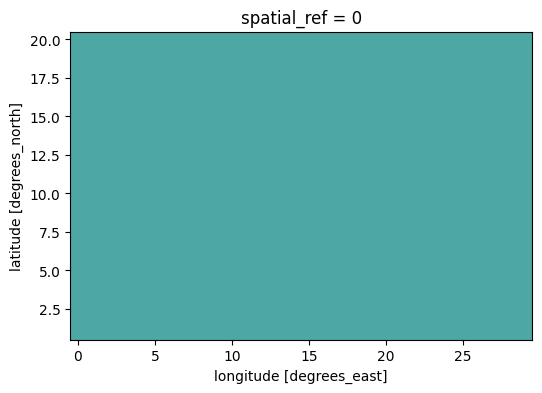

In [1]:
import abses

model = abses.main.MainModel()
module = model.nature.create_module(how="from_resolution", shape=(20, 30))
module.plot.show()

<Axes: xlabel='test', ylabel='Count'>

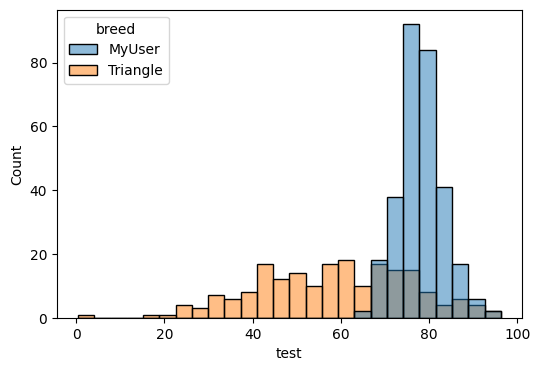

In [2]:
from abses import Actor


class Triangle(Actor):
    marker = "^"
    color = "red"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(60, 20)


class MyUser(Actor):
    marker = "user"
    color = "#FF0000"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(78, 5)


new_agents = module.random.new(Triangle, num=200)
new_users = module.random.new(MyUser, num=300)

model.actors.plot.hist("test")

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

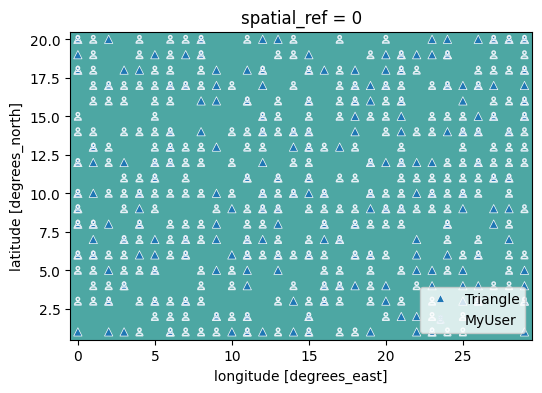

In [3]:
module.plot.show()

## Real-world map

In this section, we will visualize the real-world map of the model.

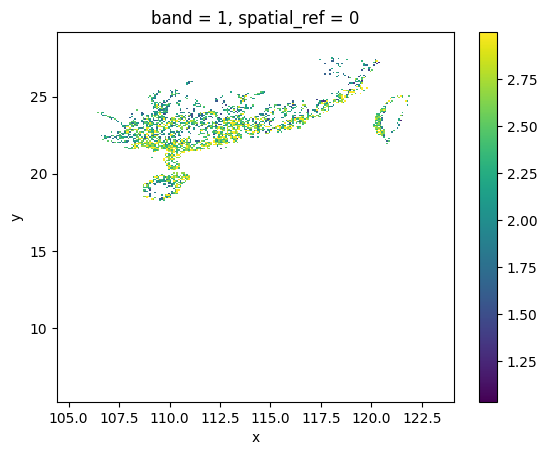

In [4]:
import rioxarray
from abses.data import load_data

xda = rioxarray.open_rasterio(load_data("farmland.tif"), masked=True)
xda.plot()

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

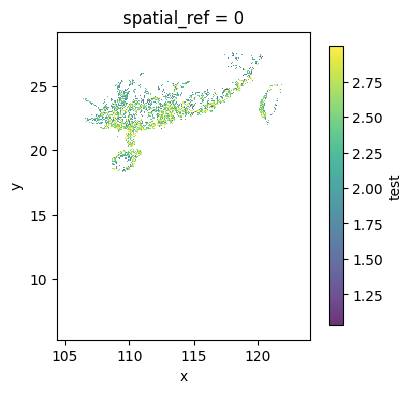

In [5]:
from abses import MainModel
from abses.data import load_data

sc = MainModel()
cropland = sc.nature.create_module(
    how="from_file",
    raster_file=load_data("farmland.tif"),
    apply_raster=True,
    name="cropland",
    attr_name="test",
)
cropland.plot.show("test")

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

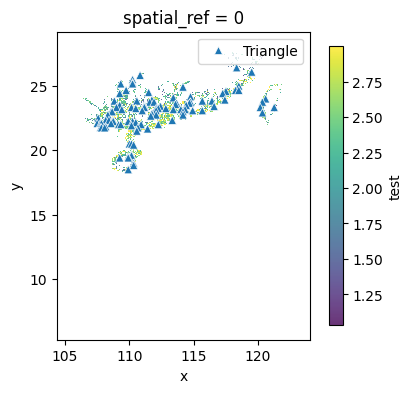

In [6]:
actors = cropland.random.new(Triangle, 100)
cropland.plot.show("test")

In [7]:
import numpy as np

xda.rio.transform

points = []
for actor in actors:
    row, col = actor.pos
    x1, y1 = xda.rio.transform() * (col, row)
    x = xda.coords["x"][col].item()
    y = xda.coords["y"][row].item()
    assert np.isclose(x, x1, rtol=1e-2), f"{x}: {x1}"
    assert np.isclose(y, y1, rtol=1e-2), f"{y}: {y1}"

<Axes: >

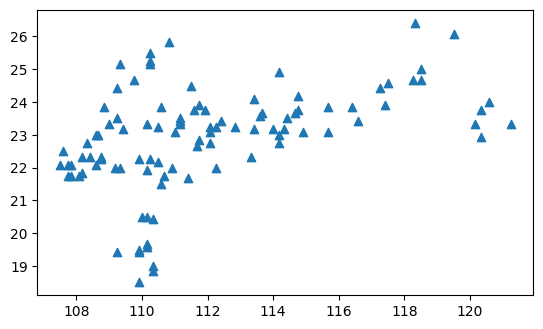

In [8]:
from shapely.geometry import Point
import geopandas as gpd

points = []
for actor in actors:
    row, col = actor.pos
    x, y = cropland.transform_coord(row, col)
    points.append(Point(x, y))

gdf = gpd.GeoDataFrame(geometry=points)
gdf.plot(marker="^")

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

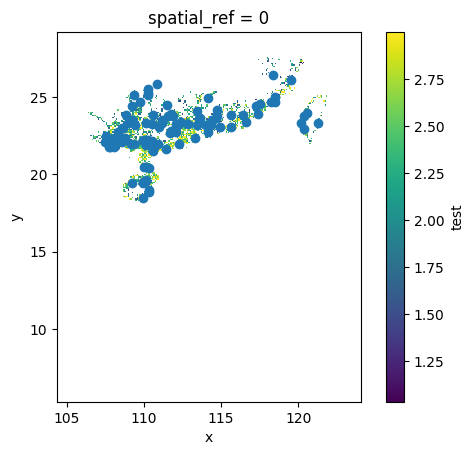

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
cropland.get_xarray("test").plot(ax=ax)
gdf.plot(ax=ax)